<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objective

- Develop a ridge regression model that minimizes overfitting while accurately predicting target values from input features.

# Problem Statement

- Implement a ridge regression algorithm to predict the dependent variable based on independent features.

- Understand the impact of different regularization strengths (alpha values) on model performance.

# Business Constraints

- The model should generalize well to unseen data.

- Avoid overfitting by tuning the regularization parameter (alpha).

- The solution should be computationally efficient.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [2]:
class MyRidge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_mean = X_train.mean(axis=0)
        y_mean = y_train.mean()
        num = np.sum((X_train - X_mean) * (y_train[:, np.newaxis] - y_mean), axis=0)
        den = np.sum((X_train - X_mean) ** 2, axis=0)

        self.m = num / (den + self.alpha)
        self.b = y_mean - np.dot(self.m, X_mean)

    def predict(self, X_test):
        return np.dot(X_test, self.m) + self.b

In [3]:
# Generate synthetic dataset with multicollinearity
np.random.seed(13)
n_samples = 100
n_features = 2
X = np.random.rand(n_samples, n_features)
X[:, 1] = X[:, 0] + np.random.normal(scale=0.1, size=n_samples)  # Introduced correlation
true_coefficients = np.array([50, -30])
y = X @ true_coefficients + np.random.normal(scale=10, size=n_samples)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
# Function to visualize regression with different alphas
def plot_ridge_regression(alphas):
    plt.scatter(X[:, 0], y, color='blue', label='Data Points')
    x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x_plot = np.column_stack((x_range, x_range + np.random.normal(scale=0.1, size=100)))

    for alpha in alphas:
        model = MyRidge(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(x_plot)
        plt.plot(x_range, y_pred, label=f'Alpha={alpha}')

    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()
    plt.title('Ridge Regression with Different Alpha Values on Correlated Data')
    plt.show()

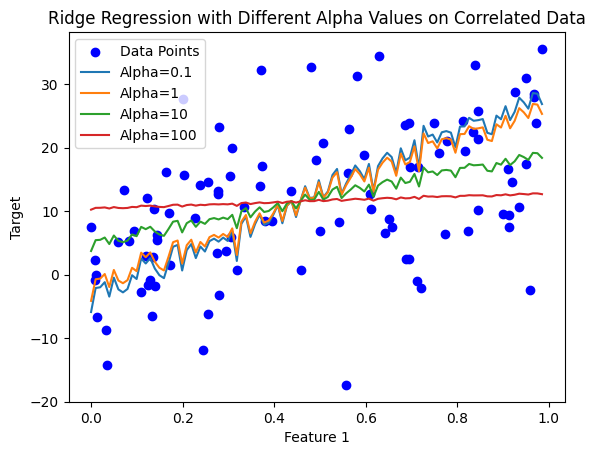

In [6]:
# Plot regression lines for different alpha values
plot_ridge_regression(alphas=[0.1, 1, 10, 100])

# Conclusion

- A lower alpha value results in a regression line that closely fits the data, but it may overfit.

- A higher alpha value results in a more generalized model, reducing variance but potentially increasing bias.

- Ridge regression provides a balance between overfitting and underfitting, making it useful in real-world predictive modeling.